# Apartment Sales Prices & Venues Data Analysis of HaNoi, VietNam

## A. Introduction

### A.1. Description & Disscusion of the Background

Hanoi is the capital of Vietnam. It covers an area of 3,328.9 square kilometres (1,285 sq mi). With an estimated population of 8.1 million as of 2019, it is the second largest city in Vietnam. The metropolitan area, encompassing nine additional neighbouring provinces, has an estimated population of 16 million. Located in the central area of the Red River Delta, Hanoi is the commercial, cultural, and educational centre of Northern Vietnam. Having an estimated nominal GDP of US$32.8 billion, it is the second most productive economic centre of Vietnam, following Ho Chi Minh City.

Originally a small settlement along the banks of the Red River, the city was founded as Thăng Long, the capital of Imperial Vietnam, in 1010 by monarch Lý Thái Tổ. Thăng Long would remain the most important political and cultural centre of Vietnam until 1802, when the Nguyễn dynasty, the last imperial dynasty of Vietnam, moved the capital to Huế. Thăng Long renamed to its current name Hanoi in 1831. In 1873, Hanoi was conquered by the French, and from 1883 to 1945, the city was the administrative centre of French Indochina. The French colonisation left a lasting impact on the city's architecture that is visible today, as showcased through the juxtaposition of French-styled avenues, bridges, buildings, and traditional Vietnamese architecture. [1]

As you can see from the wiki, Hanoi is a city with a high population and population density as 2,400/km2. As __Newcomer__ to the city, we may want to __purchase an apartment__ for planned long stay in the regions where real estate values are lower. At the same time, we may want to choose the district according to the social places density. And by this report we hope we can capture some remarkable points in this direction.

Currently, Hanoi is divided into 12 districts, 17 rural districts and one town. In this report, we will forcus on only __12 main district__ of Hanoi using a map and information chart where the real estate index is placed on this city and each district is clustered according to the venue density

### A.2. Data Description

To consider the problem we can list the datas as below:

* I collect coordinates of all 12 Boroughs (districts) via geopy and used it to create choropleth map of Apartment Sales Price Index of Hanoi.
* I used Forsquare API to get the most common venues of given Borough (district) of Hanoi [2].
* I collected latest per square meter Apartment Sales Price (ASP) () Averages for each Borough of Hanoi from real estate web page [3].

## B. Methodology

As a database, I used GitHub repository in my study. My master data which has the main components Borough, Average Apartment Price (AAP), Latitude and Longitude informations of the Hanoi.

In [2]:
!pip install folium

     |████████████████████████████████| 92kB 6.9MB/s eta 0:00:011


In [3]:
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib as mp
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist

In [20]:
# define the dataframe columns
column_names = ['Borough', 'Avg-ApartmentPrice', 'Latitude', 'Longitude']

# instantiate the dataframe
hanoi_df = pd.DataFrame(columns=column_names)

hanoi_df.head()

,Borough,Avg-ApartmentPrice,Latitude,Longitude


In [21]:
district_data_array = [{'name': 'Hoan Kiem', 'ASP': 2342.20}, {'name': 'Hai Ba Trung', 'ASP': 1667.47}, {'name': 'Ba Dinh', 'ASP':  1654.58}, {'name': 'Dong Da', 'ASP': 1358.04}, {'name': 'Tay Ho', 'ASP': 1658.88}, {'name': 'Cau Giay', 'ASP': 1345.15}, {'name': 'Bac Tu Liem', 'ASP': 1224.82}, {'name': 'Nam Tu Liem', 'ASP': 1284.98}, {'name': 'Thanh Xuan', 'ASP': 1353.75},{'name': 'Hoang Mai', 'ASP': 1022.83}, {'name': 'Long Bien', 'ASP': 1014.24}, {'name': 'Ha Dong', 'ASP': 846.63}]

#get coordinates via geocode 
for data in district_data_array:
    address = str(data['name']) + ', Ha Noi, VietNam'
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    hanoi_df = hanoi_df.append({'Borough': str(data['name']), 'Avg-ApartmentPrice':  data['ASP'],'Latitude': latitude, 'Longitude': longitude}, ignore_index=True)

As a database, I used GitHub repository in my study. My master data which has the main components Borough, Average Apartment Price, Latitude and Longitude informations of the city

In [23]:
hanoi_df.head(12)

,Borough,Avg-ApartmentPrice,Latitude,Longitude
0,Hoan Kiem,2342.20,21.028934,105.852260
1,Hai Ba Trung,1667.47,21.005970,105.857484
2,Ba Dinh,1654.58,21.036305,105.828986
3,Dong Da,1358.04,21.012891,105.827710
4,Tay Ho,1658.88,21.070907,105.821341
5,Cau Giay,1345.15,21.027277,105.791464
6,Bac Tu Liem,1224.82,21.069861,105.757339
7,Nam Tu Liem,1284.98,21.012846,105.760874
8,Thanh Xuan,1353.75,20.993886,105.814671
9,Hoang Mai,1022.83,20.974598,105.863707


I used python folium library to visualize geographic details of Istanbul and its boroughs and I created a map of Hanoi with boroughs superimposed on top. I used latitude and longitude values to get the visual as below

*Note: the closer marker's color to red the higher average apartment price

In [24]:
hanoi_lat = 21.0278
hanoi_long = 105.8342

#get color for marker
def marker_color(elev): 
    if elev in range(0,1000): 
        col = 'green'
    elif elev in range(1001,1600): 
        col = 'blue'
    elif elev in range(1600,2000): 
        col = 'orange'
    else: 
        col='red'
    return col 

# Creat Hanoi map
hanoi_map = folium.Map(
    location=[hanoi_lat, hanoi_long],
    zoom_start=12
)

# Add Marker to the map, the stronger color the higher average apartment price
for index, row in hanoi_df.iterrows():
    price_percentage = int(row["Avg-ApartmentPrice"]*1000/hanoi_df[['Avg-ApartmentPrice']].sum())
    folium.Marker(
    location=[row["Latitude"], row["Longitude"]],
    popup= str(row["Avg-ApartmentPrice"]) + ' USD/m2',
    icon=folium.Icon(color=marker_color(int(row["Avg-ApartmentPrice"])), icon='info-sign'),
    ).add_to(hanoi_map)
    
hanoi_map

In [25]:
#Foursquare API call
CLIENT_ID = 'MFN5JY3ENCCAR40NV2PTO3QM30UQWPECJH244AR1UZVFN0TC'
CLIENT_SECRET = 'ENHQE5Z0VVC2SGD1JYCVFYZBDYFQIHXQGON040OC0TZKSFAS'
VERSION = '20180605'

venues_list=[]
for index, row in hanoi_df.iterrows():
    LIMIT = 100 
    radius = 2000
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        row["Latitude"], 
        row["Longitude"], 
        radius, 
        LIMIT)
    results = requests.get(url).json()["response"]['groups'][0]['items']
    venues_list.append([(
            row["Borough"], 
            row["Latitude"], 
            row["Longitude"], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

I utilized the Foursquare API to explore the boroughs and segment them. I designed the limit as 100 venue and the radius 2000 meter for each borough from their given latitude and longitude informations. Here is a head of the list Venues name, category, latitude and longitude informations from Forsquare API.

In summary of this data 678 venues were returned by Foursquare for all 12 boroughs. Here is a merged table of boroughs and venues.

In [26]:
nearby_venues.head(20)

,Borough,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hoan Kiem,21.028934,105.85226,Apricot Boutique Hotel,21.028239,105.851055,Hotel
1,Hoan Kiem,21.028934,105.85226,Starbucks Reserve Nhà Thờ,21.029162,105.850222,Coffee Shop
2,Hoan Kiem,21.028934,105.85226,Pizza 4P's,21.029746,105.848956,Pizza Place
3,Hoan Kiem,21.028934,105.85226,Bánh Cuốn 14 Bảo Khánh,21.030196,105.850632,Vietnamese Restaurant
4,Hoan Kiem,21.028934,105.85226,Dream Beans Coffee,21.029088,105.848596,Coffee Shop
5,Hoan Kiem,21.028934,105.85226,Pasteur Street Brewing Company,21.028582,105.848394,Brewery
6,Hoan Kiem,21.028934,105.85226,Pizza 4P,21.025141,105.854438,Italian Restaurant
7,Hoan Kiem,21.028934,105.85226,Orchids Spa,21.029434,105.850434,Spa
8,Hoan Kiem,21.028934,105.85226,Hanoi La Selva Hotel,21.031374,105.854886,Hotel
9,Hoan Kiem,21.028934,105.85226,Sofitel Legend Metropole Hanoi,21.025527,105.855960,Hotel


In [27]:
nearby_venues.shape

(678, 7)

Let's check how many venues were returned for each Borough

In [28]:
nearby_venues_count = pd.DataFrame(nearby_venues.groupby(['Borough']).size())
nearby_venues_count.rename(columns={ nearby_venues_count.columns[0]: "Venues_Count" }, inplace = True)
nearby_venues_count.sort_values(by='Venues_Count', ascending=False, axis=0, inplace=True)
nearby_venues_count.head(12)

,Venues_Count
Borough,
Ba Dinh,100
Cau Giay,100
Hai Ba Trung,100
Hoan Kiem,100
Tay Ho,92
Dong Da,76
Thanh Xuan,53
Nam Tu Liem,22
Long Bien,19


We can see that Ba Dinh, Cau Giay, Hai Ba Trung, Hoan Kiem reached the 100 limit of venues. On the other hand; Ha Dong, Hoang Mai, Bac Tu Liem boroughs are below 10 venues in our given coordinates with Latitude and Longitude, in above graph.

The result doesn’t mean that inquiry run all the possible results in boroughs. Actually, it depends on given Latitude and Longitude informations and here is we just run single Latitude and Longitude pair for each borough. We can increase the possibilities with Neighborhood informations with more Latitude and Longitude informations.

We can visualize the resuls for each borough by below barchart

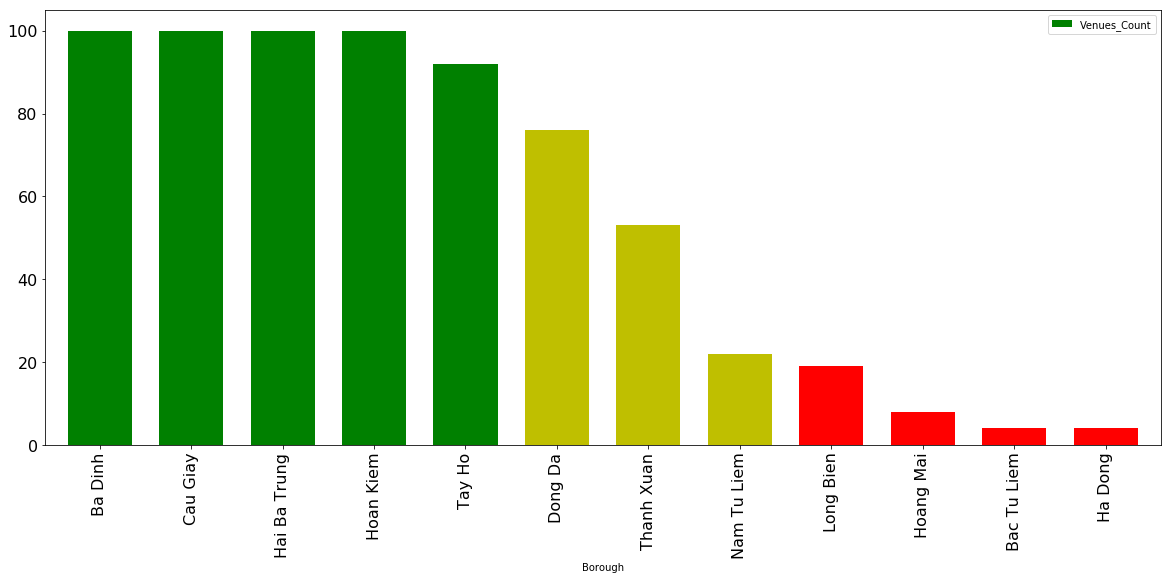

In [29]:
# Create barchart for venue visualization for each

labelsize=14

barchart = nearby_venues_count.plot(kind='bar', 
                                    figsize=(20, 8), 
                                    width=0.7, 
                                    color=[np.where(nearby_venues_count['Venues_Count']> 80, 'g', np.where(nearby_venues_count['Venues_Count'] > 20, 'y', 'r'))], 
                                    fontsize=16)

barchart

In [31]:
print('There are {} uniques categories.'.format(len(nearby_venues['Venue Category'].unique())))

There are 126 uniques categories.


In [32]:
# Further explorer data

# one hot encoding
hanoi_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add Borough column back to dataframe
hanoi_onehot['Borough'] = nearby_venues['Borough'] 

# move Borough column to the first column
fixed_columns = [hanoi_onehot.columns[-1]] + list(hanoi_onehot.columns[:-1])
hanoi_onehot = hanoi_onehot[fixed_columns]

hanoi_onehot.head()

,Borough,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,...,Tiki Bar,Train Station,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wedding Hall,Wine Bar,Wings Joint,Zoo
0,Hoan Kiem,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hoan Kiem,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hoan Kiem,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hoan Kiem,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Hoan Kiem,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
hanoi_onehot.shape

(678, 127)

In [34]:
hanoi_grouped = hanoi_onehot.groupby('Borough').mean().reset_index()
hanoi_grouped

,Borough,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,...,Tiki Bar,Train Station,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wedding Hall,Wine Bar,Wings Joint,Zoo
0,Ba Dinh,0.00,0.00000,0.01,0.00,0.01,0.000000,0.00000,0.000000,0.020000,...,0.000000,0.000000,0.00000,0.02,0.130000,0.00000,0.01,0.010000,0.01,0.00
1,Bac Tu Liem,0.00,0.00000,0.00,0.00,0.00,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.00000,0.00,0.000000,0.00,0.00
2,Cau Giay,0.01,0.00000,0.01,0.00,0.00,0.000000,0.01000,0.000000,0.040000,...,0.000000,0.000000,0.00000,0.00,0.080000,0.00000,0.00,0.000000,0.00,0.01
3,Dong Da,0.00,0.00000,0.00,0.00,0.00,0.000000,0.00000,0.000000,0.039474,...,0.013158,0.000000,0.00000,0.00,0.065789,0.00000,0.00,0.013158,0.00,0.00
4,Ha Dong,0.00,0.00000,0.00,0.00,0.00,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.000000,0.00000,0.00,0.000000,0.00,0.00
5,Hai Ba Trung,0.01,0.00000,0.00,0.00,0.01,0.000000,0.00000,0.000000,0.030000,...,0.000000,0.000000,0.00000,0.01,0.190000,0.00000,0.00,0.000000,0.00,0.00
6,Hoan Kiem,0.00,0.00000,0.00,0.01,0.01,0.000000,0.00000,0.000000,0.010000,...,0.000000,0.000000,0.00000,0.02,0.170000,0.00000,0.00,0.000000,0.00,0.00
7,Hoang Mai,0.00,0.00000,0.00,0.00,0.00,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00,0.125000,0.00000,0.00,0.000000,0.00,0.00
8,Long Bien,0.00,0.00000,0.00,0.00,0.00,0.000000,0.00000,0.105263,0.052632,...,0.000000,0.052632,0.00000,0.00,0.105263,0.00000,0.00,0.000000,0.00,0.00
9,Nam Tu Liem,0.00,0.00000,0.00,0.00,0.00,0.045455,0.00000,0.000000,0.090909,...,0.000000,0.000000,0.00000,0.00,0.045455,0.00000,0.00,0.000000,0.00,0.00


In [35]:
hanoi_grouped.shape

(12, 127)

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = hanoi_grouped['Borough']

for ind in np.arange(hanoi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hanoi_grouped.iloc[ind, :], num_top_venues)

In summary of there is 126 unique categories were returned by Foursquare, then I created a table which shows list of top 10 venue category for each borough in below table

In [20]:
neighborhoods_venues_sorted.head(20)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ba Dinh,Vietnamese Restaurant,Hotel,Café,Coffee Shop,Noodle House,Japanese Restaurant,Pizza Place,Spa,Hotpot Restaurant,BBQ Joint
1,Bac Tu Liem,Coffee Shop,Café,Business Service,Flower Shop,Confucian Temple,Dessert Shop,Dim Sum Restaurant,Donut Shop,Electronics Store,English Restaurant
2,Cau Giay,Café,Coffee Shop,Japanese Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Bakery,Shopping Mall,Multiplex,BBQ Joint,Pizza Place
3,Dong Da,Coffee Shop,Vietnamese Restaurant,Café,Market,BBQ Joint,Pizza Place,Park,Shopping Mall,Multiplex,Movie Theater
4,Ha Dong,Multiplex,History Museum,Café,Bus Station,Zoo,Dessert Shop,Dim Sum Restaurant,Donut Shop,Electronics Store,English Restaurant
5,Hai Ba Trung,Vietnamese Restaurant,Coffee Shop,Café,Hotel,Japanese Restaurant,Noodle House,Dessert Shop,BBQ Joint,Thai Restaurant,Sandwich Place
6,Hoan Kiem,Vietnamese Restaurant,Hotel,Coffee Shop,Café,Noodle House,Spa,French Restaurant,Pizza Place,Cocktail Bar,Ice Cream Shop
7,Hoang Mai,Park,Mobile Phone Shop,Soccer Field,Vietnamese Restaurant,Seafood Restaurant,Gym / Fitness Center,Lake,English Restaurant,Flower Shop,Fish & Chips Shop
8,Long Bien,Fast Food Restaurant,Auto Garage,Vietnamese Restaurant,BBQ Joint,Food Court,Multiplex,Market,Golf Course,Grocery Store,Cafeteria
9,Nam Tu Liem,Café,Hotel,BBQ Joint,Coffee Shop,Bakery,Furniture / Home Store,Multiplex,Golf Course,Tea Room,Buffet


We have some common venue categories in boroughs. In this reason I used unsupervised learning K-means algorithm to cluster the boroughs. K-Means algorithm is one of the most common cluster method of unsupervised learning.

First, I will run K-Means to cluster the boroughs into 5 clusters because when I analyze the K-Means with elbow method it ensured me the 5 degree for optimum k of the K-Means.

In [37]:
hanoi_grouped_clustering = hanoi_grouped.drop('Borough', 1)

In [38]:
#K Mean model evaluation
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,12)

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(hanoi_grouped_clustering) 
    kmeanModel.fit(hanoi_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(hanoi_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / hanoi_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(hanoi_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / hanoi_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

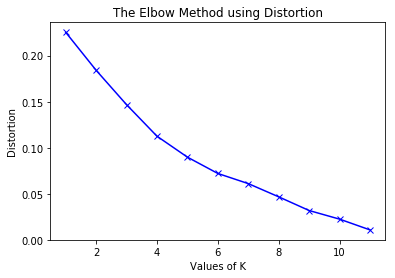

In [39]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [40]:
# set number of clusters = 5 base on Elbow method
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hanoi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 1, 1, 0, 1, 1, 3, 4, 1], dtype=int32)

In [41]:
hanoi_grouped_clustering.head()

,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bakery,...,Tiki Bar,Train Station,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wedding Hall,Wine Bar,Wings Joint,Zoo
0,0.00,0.0,0.01,0.0,0.01,0.0,0.00,0.0,0.020000,0.000000,...,0.000000,0.0,0.0,0.02,0.130000,0.0,0.01,0.010000,0.01,0.00
1,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.00,0.00
2,0.01,0.0,0.01,0.0,0.00,0.0,0.01,0.0,0.040000,0.040000,...,0.000000,0.0,0.0,0.00,0.080000,0.0,0.00,0.000000,0.00,0.01
3,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.039474,0.026316,...,0.013158,0.0,0.0,0.00,0.065789,0.0,0.00,0.013158,0.00,0.00
4,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,0.000000,0.00,0.00


In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [43]:
hanoi_merged = hanoi_df
hanoi_merged = hanoi_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

Here is my merged table with cluster labels for each borough.

In [44]:
hanoi_merged.head(12)

,Borough,Avg-ApartmentPrice,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hoan Kiem,2342.20,21.028934,105.852260,1,Vietnamese Restaurant,Hotel,Coffee Shop,Café,Noodle House,Spa,French Restaurant,Pizza Place,Cocktail Bar,Ice Cream Shop
1,Hai Ba Trung,1667.47,21.005970,105.857484,1,Vietnamese Restaurant,Coffee Shop,Café,Hotel,Japanese Restaurant,Noodle House,Dessert Shop,BBQ Joint,Thai Restaurant,Sandwich Place
2,Ba Dinh,1654.58,21.036305,105.828986,1,Vietnamese Restaurant,Hotel,Café,Coffee Shop,Noodle House,Japanese Restaurant,Pizza Place,Spa,Hotpot Restaurant,BBQ Joint
3,Dong Da,1358.04,21.012891,105.827710,1,Coffee Shop,Vietnamese Restaurant,Café,Market,BBQ Joint,Pizza Place,Park,Shopping Mall,Multiplex,Movie Theater
4,Tay Ho,1658.88,21.070907,105.821341,1,Café,Coffee Shop,Vietnamese Restaurant,Hotel,Italian Restaurant,Wine Bar,Noodle House,Bakery,Sports Bar,French Restaurant
5,Cau Giay,1345.15,21.027277,105.791464,1,Café,Coffee Shop,Japanese Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Bakery,Shopping Mall,Multiplex,BBQ Joint,Pizza Place
6,Bac Tu Liem,1224.82,21.069861,105.757339,2,Coffee Shop,Café,Business Service,Flower Shop,Confucian Temple,Dessert Shop,Dim Sum Restaurant,Donut Shop,Electronics Store,English Restaurant
7,Nam Tu Liem,1284.98,21.012846,105.760874,1,Café,Hotel,BBQ Joint,Coffee Shop,Bakery,Furniture / Home Store,Multiplex,Golf Course,Tea Room,Buffet
8,Thanh Xuan,1353.75,20.993886,105.814671,1,Coffee Shop,Bakery,Café,Pizza Place,Multiplex,Korean Restaurant,Fast Food Restaurant,Beer Garden,Supermarket,Beer Bar
9,Hoang Mai,1022.83,20.974598,105.863707,3,Park,Mobile Phone Shop,Soccer Field,Vietnamese Restaurant,Seafood Restaurant,Gym / Fitness Center,Lake,English Restaurant,Flower Shop,Fish & Chips Shop


We can also estimate the number of 1st Most Common Venue in each cluster. Thus, we can create a table which may help us to find proper labels for each cluster.

In [45]:
#Creating a table for 1st Most Common Venue in each cluster
cluster_label = hanoi_merged[['Cluster Labels', '1st Most Common Venue']].copy()

In [46]:
first_venue_df = cluster_label.groupby(['Cluster Labels', '1st Most Common Venue']).size()

In [47]:
new_df = first_venue_df.to_frame(name = 'count').reset_index()

In [48]:
new_df.head(10)

,Cluster Labels,1st Most Common Venue,count
0,0,Multiplex,1
1,1,Café,3
2,1,Coffee Shop,2
3,1,Vietnamese Restaurant,3
4,2,Coffee Shop,1
5,3,Park,1
6,4,Fast Food Restaurant,1


When we examine above table we can label each cluster as follows:

- Cluster 0 : “Multiplexs”
- Cluster 1 : “Café” and "Vietnamese Restaurant"
- Cluster 2 : “Coffee Shop”
- Cluster 3 : “Park”
- Cluster 4 : “Fast Food Restaurant”

We can also estimate the number of 1st Most Common Venue in each cluster. Thus, we can create a bar chart which may help us to find proper labels for each cluster.

One of my aim was also show the number of top 3 venues information for each borough on the map. Thus, I grouped each borough by the number of top 3 venues and I combined those informations in __Join__ column.

In [49]:
top_three_venue_df = hanoi_merged[['Borough', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']].copy()

In [50]:
top_three_venue_df['Join'] = top_three_venue_df[['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']].agg(','.join, axis=1)

In [51]:
top_three_venue_df.drop(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue'], axis=1)

,Borough,Join
0,Hoan Kiem,"Vietnamese Restaurant,Hotel,Coffee Shop"
1,Hai Ba Trung,"Vietnamese Restaurant,Coffee Shop,Café"
2,Ba Dinh,"Vietnamese Restaurant,Hotel,Café"
3,Dong Da,"Coffee Shop,Vietnamese Restaurant,Café"
4,Tay Ho,"Café,Coffee Shop,Vietnamese Restaurant"
5,Cau Giay,"Café,Coffee Shop,Japanese Restaurant"
6,Bac Tu Liem,"Coffee Shop,Café,Business Service"
7,Nam Tu Liem,"Café,Hotel,BBQ Joint"
8,Thanh Xuan,"Coffee Shop,Bakery,Café"
9,Hoang Mai,"Park,Mobile Phone Shop,Soccer Field"


## C. Results

In final section, I created a table and a cluster map which have all informations for each borough in Hanoi:
- Borough name,
- Cluster name,
- Average Apartment Sales Price
- Top 3 number of venue

In [52]:
final_df = hanoi_merged[['Borough', 'Avg-ApartmentPrice', 'Latitude', 'Longitude', 'Cluster Labels']].copy()
final_df['Join venue'] = top_three_venue_df['Join']
final_df.head(12)

,Borough,Avg-ApartmentPrice,Latitude,Longitude,Cluster Labels,Join venue
0,Hoan Kiem,2342.20,21.028934,105.852260,1,"Vietnamese Restaurant,Hotel,Coffee Shop"
1,Hai Ba Trung,1667.47,21.005970,105.857484,1,"Vietnamese Restaurant,Coffee Shop,Café"
2,Ba Dinh,1654.58,21.036305,105.828986,1,"Vietnamese Restaurant,Hotel,Café"
3,Dong Da,1358.04,21.012891,105.827710,1,"Coffee Shop,Vietnamese Restaurant,Café"
4,Tay Ho,1658.88,21.070907,105.821341,1,"Café,Coffee Shop,Vietnamese Restaurant"
5,Cau Giay,1345.15,21.027277,105.791464,1,"Café,Coffee Shop,Japanese Restaurant"
6,Bac Tu Liem,1224.82,21.069861,105.757339,2,"Coffee Shop,Café,Business Service"
7,Nam Tu Liem,1284.98,21.012846,105.760874,1,"Café,Hotel,BBQ Joint"
8,Thanh Xuan,1353.75,20.993886,105.814671,1,"Coffee Shop,Bakery,Café"
9,Hoang Mai,1022.83,20.974598,105.863707,3,"Park,Mobile Phone Shop,Soccer Field"


In [53]:
# create map
map_clusters = folium.Map(location=[hanoi_lat, hanoi_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, avg_price, join_venue in zip(final_df['Latitude'], final_df['Longitude'], final_df['Borough'], final_df['Cluster Labels'], final_df['Avg-ApartmentPrice'], final_df['Join venue']):
    label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster) + ' Avr Apartment Price: ' + str(avg_price) + ' USD/m2 ' + ' Common venues: ' + str(join_venue))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

## D. Discussion

As I mentioned before, Hanoi is a city with a high population density in a narrow area. The total number of measurements and population densities of the 12 districts in total can vary. As there is such a complexity, very different approaches can be tried in clustering and classification studies. Moreover, it is obvious that not every classification method can yield the same high quality results for this metropol.


I used the Kmeans algorithm as part of this clustering study. When I tested the Elbow method, I set the optimum k value to 5. However, only 12 district coordinates were used. For more detailed and accurate guidance, the data set can be expanded and the details of the neighborhood or street can also be drilled.

I also performed data analysis through this information by adding the coordinates of districts and apartment sales price averages as static data on GitHub. In future studies, these data can also be accessed dynamically from specific platforms or packages.

## F. Conclusion

As a result, Newcomers are turning to big cities to start a business or work. For this reason, people can achieve better outcomes through their access to the platforms where such information is provided.

Not only for Newcomers but also city managers can manage the city more regularly by using similar data analysis types or platforms.

Thank you for your attention,

Tran Thanh Tung

## G. References

1. [Hanoi - Wiki](https://en.wikipedia.org/wiki/Hanoi).
2. [Forsquare API](https://developer.foursquare.com/)
3. [Apartment average price](https://mogi.vn/gia-nha-dat)